Steps to tackle a time series problem
loading and handling TS in Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
data = pd.read_csv('C:/Users/lenovo/python_code/house.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,7129300520,2014/10/13,221900,3,1.00,1180,5650,1.0,USA
1,6414100192,2014/10/14,538000,3,2.25,2570,7242,2.0,USA
2,5631500400,2014/10/15,180000,2,1.00,770,10000,1.0,USA
3,2487200875,2014/10/16,604000,4,3.00,1960,5000,1.0,USA
4,1954400510,2014/10/17,510000,3,2.00,1680,8080,1.0,USA
5,7237550310,2014/10/18,1225000,4,4.50,5420,101930,1.0,USA
6,1321400060,2014/10/19,257500,3,2.25,1715,6819,2.0,USA
7,2008000270,2014/10/20,291850,3,1.50,1060,9711,1.0,USA
8,2414600126,2014/10/21,229500,3,1.00,1780,7470,1.0,USA
9,3793500160,2014/10/22,323000,3,2.50,1890,6560,2.0,USA


In [3]:
print('\nData Types:')
print(data.dtypes)


Data Types:
id               int64
date            object
price            int64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
country         object
dtype: object


check datatype of index

In [4]:
data['date'].head()

0    2014/10/13
1    2014/10/14
2    2014/10/15
3    2014/10/16
4    2014/10/17
Name: date, dtype: object

In [5]:
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")

In [6]:
data['date'].head()

0   2014-10-13
1   2014-10-14
2   2014-10-15
3   2014-10-16
4   2014-10-17
Name: date, dtype: datetime64[ns]

In [7]:
print(data.dtypes)

id                      int64
date           datetime64[ns]
price                   int64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
country                object
dtype: object


In [8]:
data = data.set_index('date')

convert to time series

In [9]:
ts = data['price']
print(ts.head(30))

date
2014-10-13     221900
2014-10-14     538000
2014-10-15     180000
2014-10-16     604000
2014-10-17     510000
2014-10-18    1225000
2014-10-19     257500
2014-10-20     291850
2014-10-21     229500
2014-10-22     323000
2014-10-23     662500
2014-10-24     468000
2014-10-25     310000
2014-10-26     400000
2014-10-27     530000
2014-10-28     650000
2014-10-29     395000
2014-10-30     485000
2014-10-31     189000
2014-11-01     230000
2014-11-02     385000
2014-11-03    2000000
2014-11-04     285000
2014-11-05     252700
2014-11-06     329000
2014-11-07     233000
2014-11-08     937000
2014-11-09     667000
2014-11-10     438000
2014-11-11     719000
Name: price, dtype: int64


check for stationarity

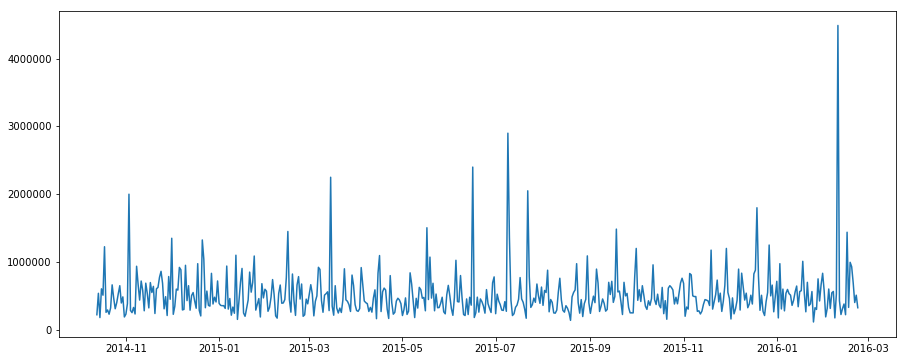

In [10]:
plt.plot(ts)

function for testing stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
def test_stationarity(timeseries):
    #1.Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries,window=12)
    #rolstd = pd.rolling_std(timeseries,window = 12)
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    #2.Plot rolling statistics
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(rolmean,color = 'red',label = 'Rolling Mean')
    std = plt.plot(rolstd,color = 'black',label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #3.Perform Dicky-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

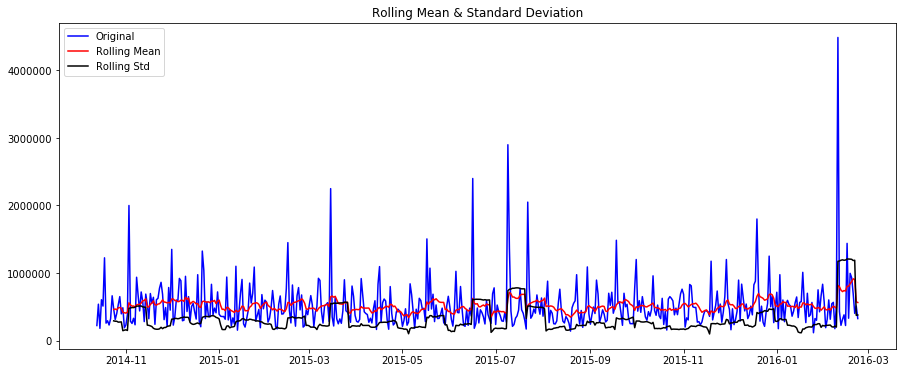

Results of Dickey-Fuller Test:
Test Statistic                -1.262938e+01
p-value                        1.516625e-23
#Lag Used                      4.000000e+00
Number of Observations Used    4.940000e+02
Critical Value(1%)            -3.443657e+00
Critical Value(5%)            -2.867408e+00
Critical Value(10%)           -2.569896e+00
dtype: float64


In [13]:
test_stationarity(ts)

Making TS Stationary
Estimating & Eliminating Trend

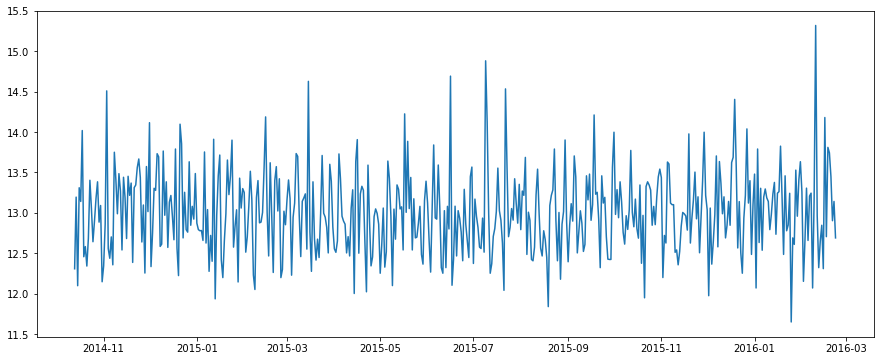

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)

Smoothing
Moving average

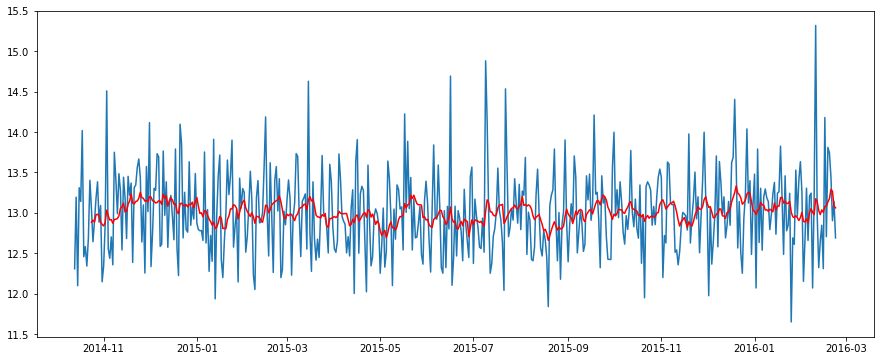

In [15]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [16]:
ts_log_moving_avg_diff = ts_log-moving_avg
ts_log_moving_avg_diff.head(12)

date
2014-10-13         NaN
2014-10-14         NaN
2014-10-15         NaN
2014-10-16         NaN
2014-10-17         NaN
2014-10-18         NaN
2014-10-19         NaN
2014-10-20         NaN
2014-10-21         NaN
2014-10-22         NaN
2014-10-23         NaN
2014-10-24    0.172049
Name: price, dtype: float64

In [17]:
# Delete all rows with null values in the dataframe
#True means to change directly on the original data
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

date
2014-10-24    0.172049
2014-10-25   -0.267709
2014-10-26    0.011883
2014-10-27    0.203302
2014-10-28    0.401281
Name: price, dtype: float64

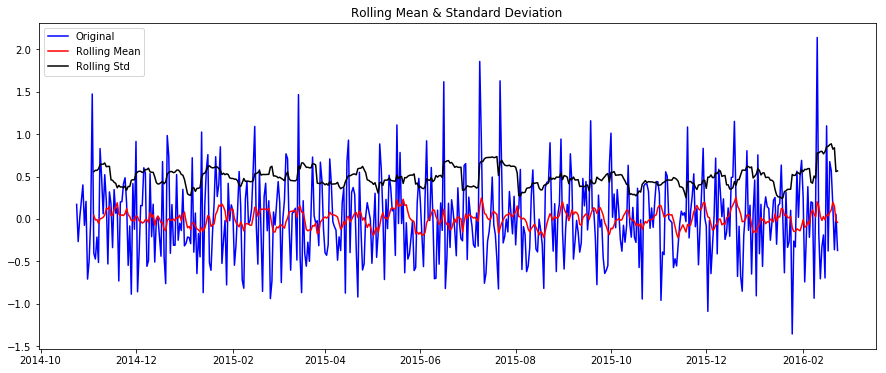

Results of Dickey-Fuller Test:
Test Statistic                -8.670668e+00
p-value                        4.555676e-14
#Lag Used                      1.800000e+01
Number of Observations Used    4.690000e+02
Critical Value(1%)            -3.444370e+00
Critical Value(5%)            -2.867722e+00
Critical Value(10%)           -2.570063e+00
dtype: float64


In [18]:
test_stationarity(ts_log_moving_avg_diff)

Exponentially Weighted Moving Average

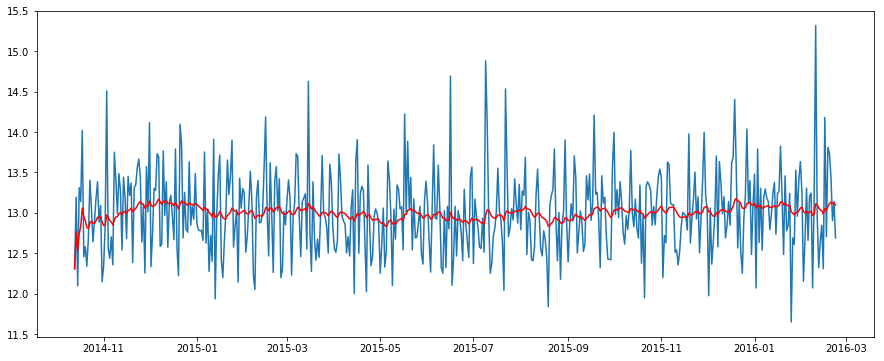

In [19]:
exwighted_avg = ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_log)
plt.plot(exwighted_avg,color = 'red')
#expwighted_avg.plot(style='k--')

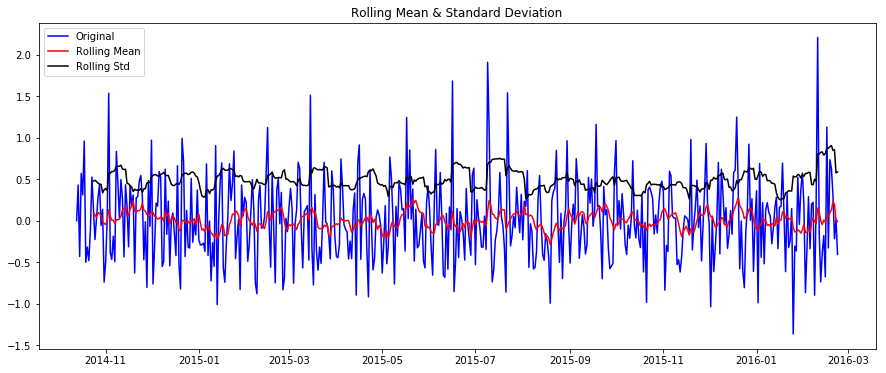

Results of Dickey-Fuller Test:
Test Statistic                -1.365555e+01
p-value                        1.556301e-25
#Lag Used                      4.000000e+00
Number of Observations Used    4.940000e+02
Critical Value(1%)            -3.443657e+00
Critical Value(5%)            -2.867408e+00
Critical Value(10%)           -2.569896e+00
dtype: float64


In [20]:
ts_log_ewma_diff = ts_log-exwighted_avg
test_stationarity(ts_log_ewma_diff)

Eliminating Trend and Seasonality

Differencing

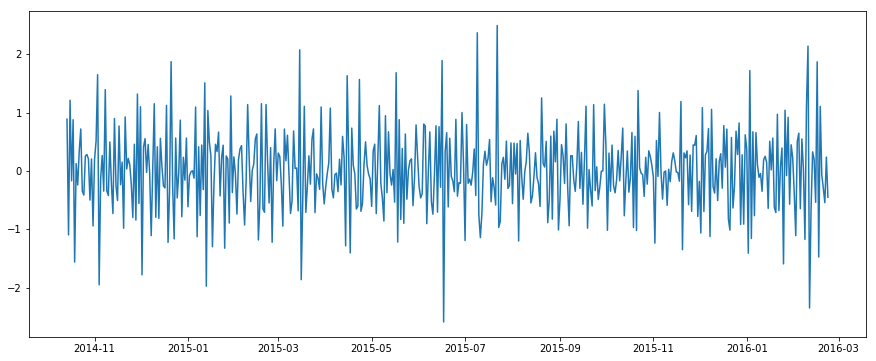

In [21]:
#Take first difference
ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)

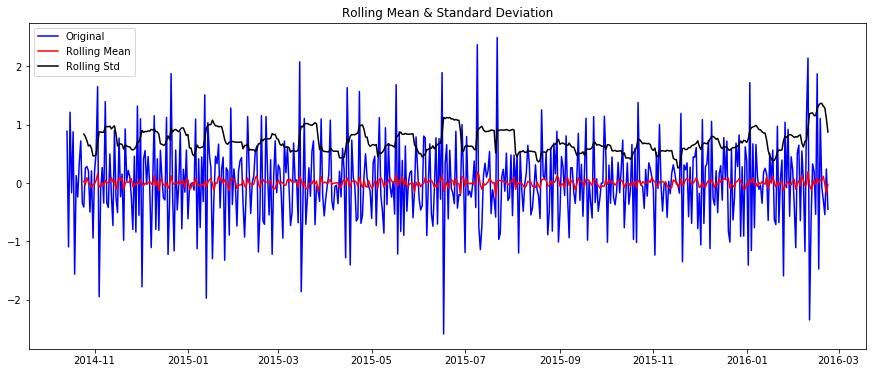

Results of Dickey-Fuller Test:
Test Statistic                -1.159649e+01
p-value                        2.712676e-21
#Lag Used                      1.200000e+01
Number of Observations Used    4.850000e+02
Critical Value(1%)            -3.443905e+00
Critical Value(5%)            -2.867518e+00
Critical Value(10%)           -2.569954e+00
dtype: float64


In [22]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

Decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [24]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

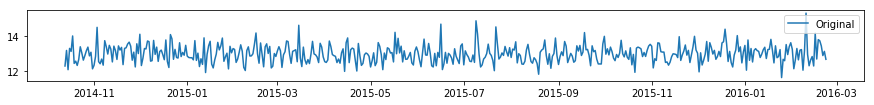

In [25]:
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')

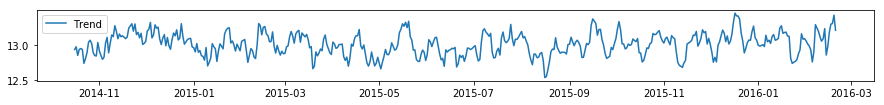

In [26]:
plt.subplot(412)
plt.plot(trend,label ='Trend')
plt.legend(loc='best')

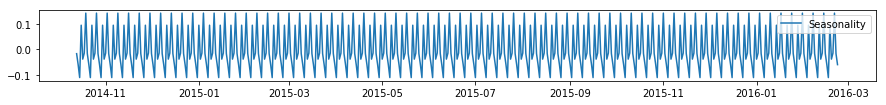

In [27]:
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

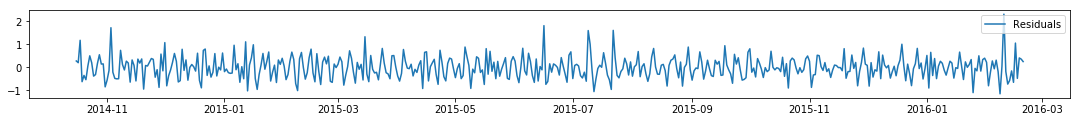

In [28]:
plt.subplot(414)
plt.plot(residual,label="Residuals")
plt.legend(loc="best")
plt.tight_layout()

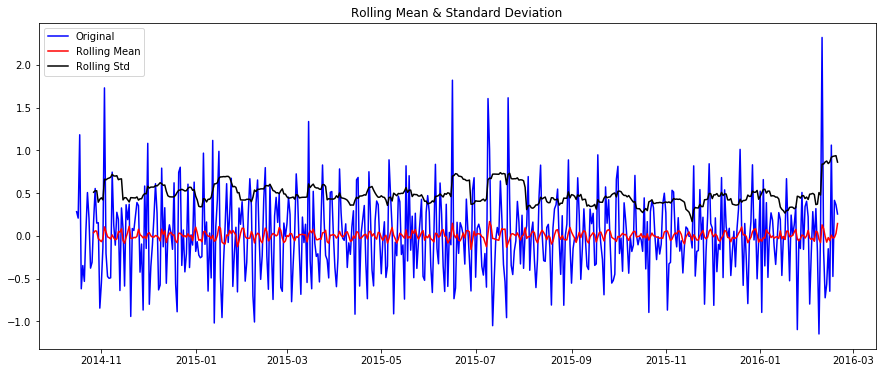

Results of Dickey-Fuller Test:
Test Statistic                -1.004111e+01
p-value                        1.495504e-17
#Lag Used                      1.800000e+01
Number of Observations Used    4.740000e+02
Critical Value(1%)            -3.444221e+00
Critical Value(5%)            -2.867657e+00
Critical Value(10%)           -2.570028e+00
dtype: float64


In [29]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Final Forecasting

In [30]:
from statsmodels.tsa.arima_model import ARIMA

ACF&PACF plots

In [31]:
from statsmodels.tsa.stattools import acf,pacf
#ACF and PACF plots:
lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20,method='ols')

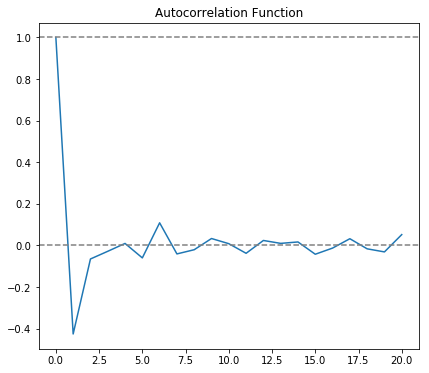

In [32]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

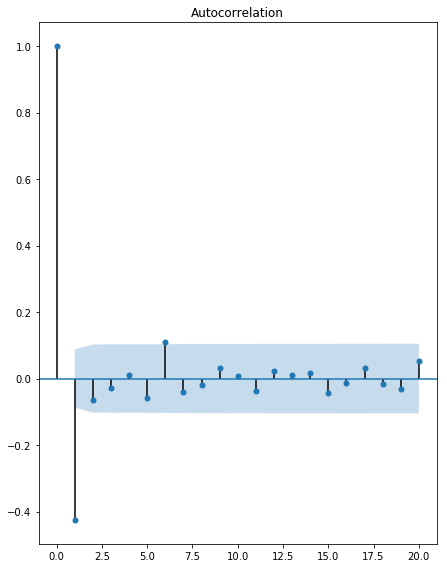

In [33]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(ts_log_diff,lags=20,ax=ax1)
fig.tight_layout()
plt.show()

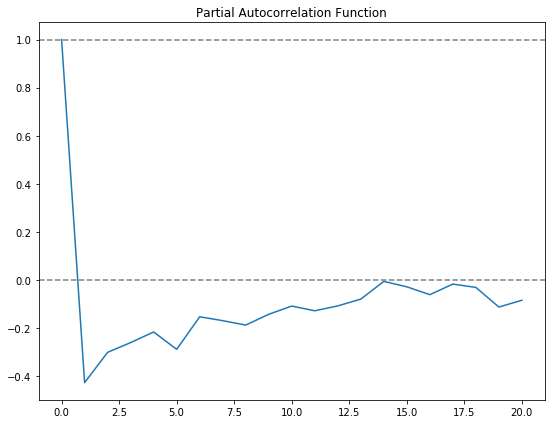

In [34]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1,linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

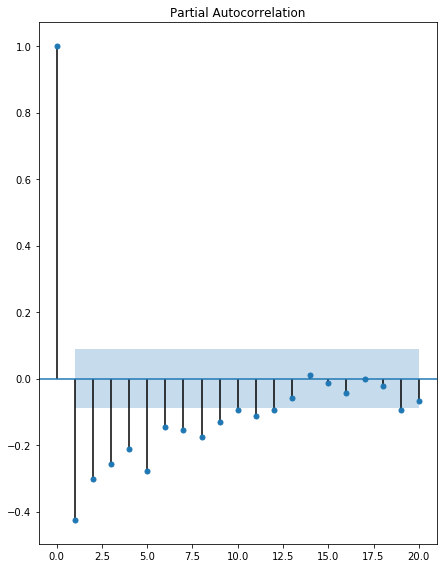

In [35]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff,lags=20,ax=ax2)
fig.tight_layout()
plt.show()

ARIMA Model

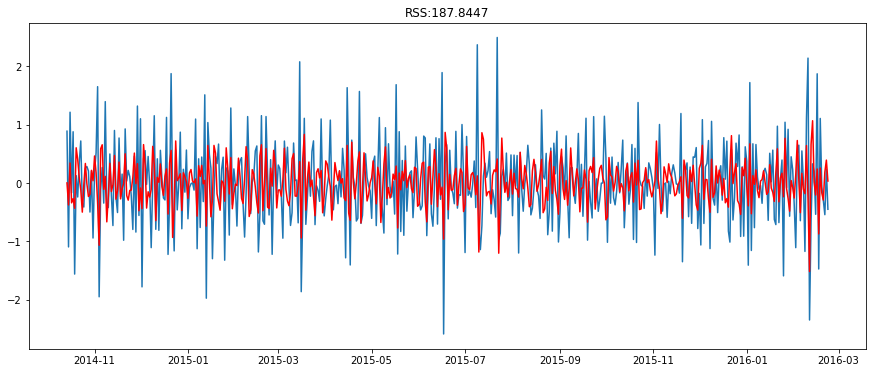

In [36]:
model = ARIMA(ts_log,order=(2,1,0))
#p is the autoregressive order, d is the number of differences made when time becomes stationary, 
#and q is the moving average order
#ARIMA(p, d, q)
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


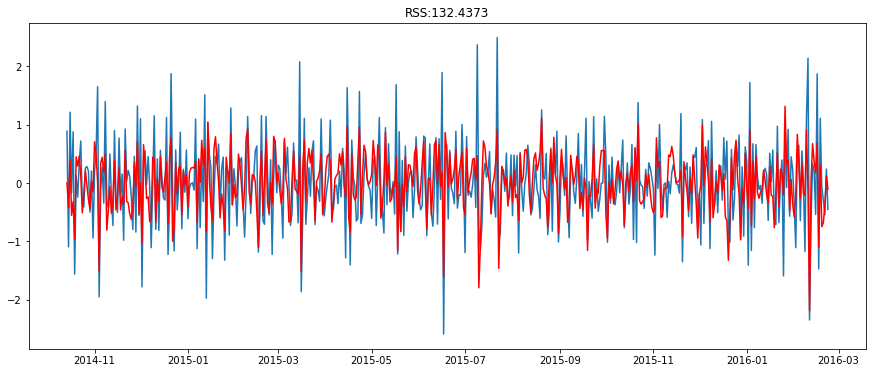

In [46]:
model = ARIMA(ts_log,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color="red")
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues-ts_log_diff)**2))

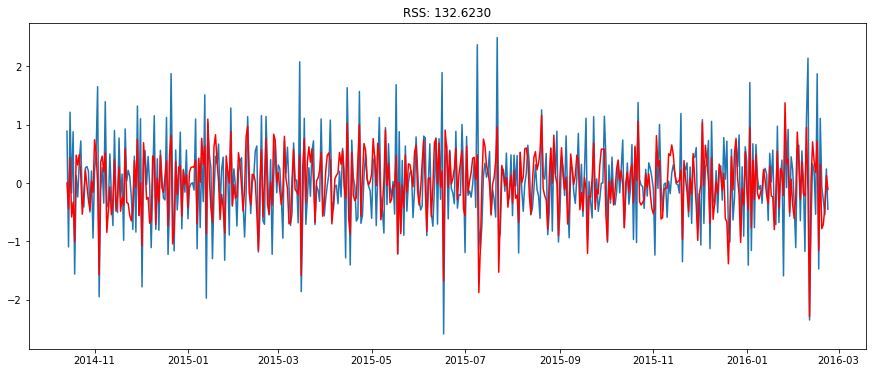

In [38]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

convert to original scale

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2014-10-14    0.000091
2014-10-15   -0.442679
2014-10-16    0.434906
2014-10-17   -0.581693
2014-10-18   -0.329932
dtype: float64


In [40]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2014-10-14    0.000091
2014-10-15   -0.442588
2014-10-16   -0.007682
2014-10-17   -0.589375
2014-10-18   -0.919307
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)


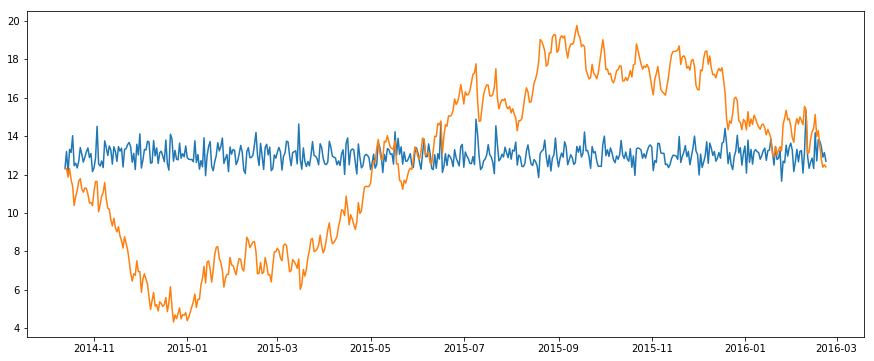

In [42]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

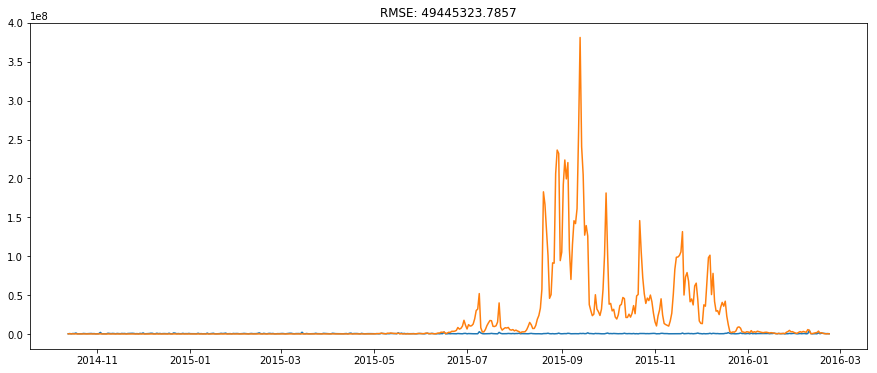

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))